# PyTorch. Основы: синтаксис, torch.cuda и torch.autograd

## Задание 7.1

In [ ]:
import torch
import matplotlib.pyplot as plt

### Задача 1

1). Создайте два вещественных тензора: `a` размером (3, 4) и `b` размером (12,)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (2, 2, 3)  
3). Выведите первый столбец матрицы `a` с помощью индексации

In [ ]:
a = torch.FloatTensor(3, 4)
b = torch.FloatTensor(12, 1)
c = b.view(2, 2, 3)
a[:, 0]

tensor([1.1606e-35, 1.1330e-36, 1.1322e-36])

### Задача 2

1). Создайте два вещественных тензора: `a` размером (5, 2) и `b` размером (1,10)   
2). Создайте тензор `c`, являющийся тензором `b`, но размера (5, 2)  
3). Произведите все арифметические операции с тензорами `a` и `c`

In [ ]:
a = torch.FloatTensor(5, 2)
b = torch.FloatTensor(1, 10)
c = b.view(5, 2)

In [ ]:
a.add(c)

tensor([[1.2950e-35, 0.0000e+00],
        [8.8282e-44, 0.0000e+00],
        [       nan, 0.0000e+00],
        [2.7521e-14, 1.8369e+28],
        [4.3066e+21, 1.1824e+22]])

In [ ]:
a.sub(c)

tensor([[ 0.0000e+00,  0.0000e+00],
        [ 1.2612e-44,  0.0000e+00],
        [        nan,  0.0000e+00],
        [ 5.4643e-17,  1.8369e+28],
        [-4.3066e+21, -1.1824e+22]])

In [ ]:
a.mul(c)

tensor([[0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00],
        [       nan, 0.0000e+00],
        [1.8935e-28, 1.1769e+31],
        [8.3692e+02, 3.9893e+10]])

In [ ]:
a.div(c)

tensor([[1.0000e+00,        nan],
        [1.3333e+00,        nan],
        [       nan,        nan],
        [1.0040e+00, 2.8670e+25],
        [4.5125e-41, 2.8533e-34]])

### Задача 3

1). Создайте тензор *целых чисел* `images` размерности (100, 200, 200, 3) (можно интерпретировать это как 100 картинок размера 200х200 с тремя цветовыми каналами, то есть 100 цветных изображений 200х200). Заполните его нулями  

2). Сделайте так, чтобы у $i$-ой по порядку картинки была нарисована белая полоса толщиной два пикселя в строках, которые соответствуют номеру картинки. Например, у 3-ей по порядку картинки белая полоска будет занимать 6 и 7 строки, у 99 - 198 и 199. Сделать белую строку можно, записав в ячейки тензора число 255 (по всем трём каналам). Выведите несколько примеров с помощью `pyplot`  

3). Посчитайте среднее тензора `images` по 1-ой оси (по сути - средняя картинка), умножьте полученный тензор на 70. Нарисуйте с помощью `pyplot`, должна получиться серая картинка (при взятии среднего нужно привести тензор к float с помощью `.float()`, при отрисовке обратно к int с помощью `.int()`)

In [ ]:
# 1
images = torch.IntTensor(100, 200, 200, 3).zero_()

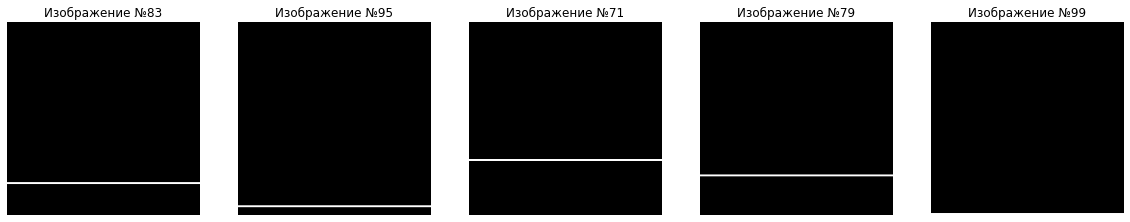

In [ ]:
# 2
for i in range(len(images)):
    images[i, i*2:i*2+2, :, :] = 255

fig, axs = plt.subplots(1, 5, figsize=(20, 4))
for ax, i in zip(axs, torch.randint(100, (5,))):
    ax.imshow(images[i])
    ax.axis('off')
    ax.set_title(f'Изображение №{i.item()}')
plt.show()

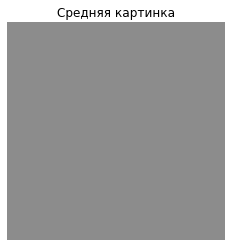

In [ ]:
# 3
imgs_mean = images.float().mean(0)

plt.imshow(imgs_mean.int() * 70)
plt.axis('off')
plt.title('Средняя картинка')
plt.show()

### Задача 4

- В Colab нажмите в меню сверху: `Runtime` -> `Change Runtime Type` -> `GPU`, где изначально стоит `None` (`Среда выполнение` - `Сменить среду выполнения`)
- Объявите тензор `a` размера (2, 3, 4) и тензор `b` размера (1, 8, 3) на GPU, иницилизируйте их случайно равномерно (`.uniform_()`)
- Затем измените форму тензора `b`, чтобы она совпадала с формой тензора `a`, получите тензор `c`  
- Переместите `c` на CPU, переместите `a` на CPU  
- Оберните их в `Variable()`
- Объявите тензор `L = torch.mean((c - a) `**` 2)` и посчитайте градиент `L` по `c` ( то есть $\frac{\partial{L}}{\partial{c}})$
- Выведите градиент `L` по `c`

In [ ]:
from torch.autograd import Variable

a = torch.Tensor(2, 3, 4).uniform_()
a.cuda()
b = torch.Tensor(1, 8, 3).uniform_()
b.cuda()
c = b.view(2, 3, 4)
c.cpu()
a.cpu()

a = Variable(a, requires_grad=True)
c = Variable(c, requires_grad=True)
L = torch.mean((c - a) ** 2)
L.backward()

print(c.grad)

tensor([[[-0.0231, -0.0310,  0.0010, -0.0636],
         [-0.0412,  0.0607,  0.0616, -0.0383],
         [ 0.0345, -0.0461,  0.0476, -0.0464]],

        [[ 0.0166,  0.0485,  0.0203, -0.0293],
         [ 0.0547,  0.0480,  0.0039,  0.0184],
         [-0.0090,  0.0298,  0.0028, -0.0372]]])
